In [2]:
import wget
import pandas as pd
from pandas.compat import StringIO
import numpy as np
import re

In [ ]:
df = pd.read_csv('data/users.dat', 
                 sep="::", #separator whitespace
                 index_col=0,
                 header=None,
                ) 

In [ ]:
df.columns=['twitter_id']
df.index.name = 'user_id'

In [52]:
df_movies = pd.read_csv('data/movies.dat', 
                 sep="::", #separator whitespace
                 index_col=False,
                 header=None,
                  converters={0: lambda x: str(x)}
                ) 

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [53]:
def get_year():
    years = []
    for year in df_movies[1]:
        y = re.search('\(.*?\)',year)[0]
        y = y.replace("(",'').replace(")",'')
        years.append(int(y))
    return years

In [54]:
df_movies['year']= get_year()

In [55]:
def clean_title():
    titles = []
    for title in df_movies[1]:
        y = re.search('\(.*?\)',title)[0]
        title = title.replace(y,'')
        title = title.rstrip()
        titles.append(title)
    return titles

In [56]:
df_movies[1] = clean_title()

In [57]:
def split_genres():
    genres = []
    for genre in df_movies[2]:
        try:
            g = genre.split("|")
            genres.append(g)
        except:
            genres.append(None)
    return genres

In [58]:
df_movies[2] = split_genres()

In [59]:
df_movies.head()

,0,1,2,year
0,0000008,Edison Kinetoscopic Record of a Sneeze,"[Documentary, Short]",1894
1,0000010,La sortie des usines Lumière,"[Documentary, Short]",1895
2,0000012,The Arrival of a Train,"[Documentary, Short]",1896
3,25,The Oxford and Cambridge University Boat Race,None,1895
4,0000091,Le manoir du diable,"[Short, Horror]",1896


In [60]:
df_movies.head()

,0,1,2,year
0,0000008,Edison Kinetoscopic Record of a Sneeze,"[Documentary, Short]",1894
1,0000010,La sortie des usines Lumière,"[Documentary, Short]",1895
2,0000012,The Arrival of a Train,"[Documentary, Short]",1896
3,25,The Oxford and Cambridge University Boat Race,None,1895
4,0000091,Le manoir du diable,"[Short, Horror]",1896


In [61]:
df_movies.columns = ['imdb_id','movie_title','movie_genres','year']

In [62]:
df_movies.index.name = 'movie_id'

In [63]:
df_ratings = pd.read_csv("data/ratings.dat", 
                 sep="::", #separator whitespace
                 index_col=0,
                 header=None,
                 converters={1: lambda x: str(x)}
                ) 

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [64]:
df_ratings.index.name = 'user_id'

In [65]:
df_ratings.columns = ['imdb_id','rating','?']

In [66]:
most_popular_movies = pd.DataFrame(df_ratings['imdb_id'].value_counts())

In [67]:
most_popular_movies.columns = ['count']

In [68]:
most_popular_movies.index.name = "imdb_id"

In [69]:
df_movies = df_movies.join(most_popular_movies,on='imdb_id',how='left')

In [70]:
df_movies.sort_values(by=['count']).head()

,imdb_id,movie_title,movie_genres,year,count
movie_id,,,,,
0,0000008,Edison Kinetoscopic Record of a Sneeze,"[Documentary, Short]",1894,1
17706,1351177,Last of the Living,"[Comedy, Horror, Sci-Fi]",2009,1
17704,1348324,A Touch of Grey,[Comedy],2009,1
17703,1348318,Protektor,[Drama],2009,1
17700,1347007,Skjult,"[Horror, Thriller]",2009,1


In [71]:
most_popular_df = df_movies[df_movies['count'] > 10]

In [72]:
most_popular_df.sort_values(by=['count']).head()

,imdb_id,movie_title,movie_genres,year,count
movie_id,,,,,
24520,2667918,About Alex,[Drama],2014,11
2965,0060277,Dai-bosatsu tôge,"[Action, Drama]",1966,11
12912,0377818,The Dukes of Hazzard,"[Action, Adventure, Comedy]",2005,11
19947,1743720,The Greatest Movie Ever Sold,"[Documentary, Comedy]",2011,11
12948,0380268,Cocaine Cowboys,"[Documentary, Crime]",2006,11


In [73]:
import requests
import json

In [74]:
def make_movies_df():
    imdb_id = []
    title = []
    year = []
    rated = []
    runtime = []
    plot = []
    language = []
    country = []
    awards = []
    poster_urls = []
    imdb_ratings = []
    imdb_votes = []
    rotten_tomatoes = []
    metacritic = []
    boxoffice = []
    production = []
    release_date = []
    t = []
    writer = []
    director = []
    genres = []
    actors = []
    c = 0
    for index,i in enumerate(most_popular_df['imdb_id'].values):
        if c % 1000 == 0:
            print(c/len(most_popular_df['imdb_id']))
        c+=1
        try:
            imdb_id.append(i)
            r = requests.get(f"http://www.omdbapi.com/?i=tt{i}&plot=full&apikey=#####")
            title.append(r.json()['Title'])
            year.append(int(r.json()['Year']))
            rated.append(r.json()['Rated'])
            runtime.append(r.json()['Runtime'])
            plot.append(r.json()['Plot'])
            language.append(r.json()['Language'])
            country.append(r.json()['Country'])
            awards.append(r.json()['Awards'])
            poster_urls.append(r.json()['Poster'])
            imdb_ratings.append((r.json()['imdbRating']))
            imdb_votes.append((r.json()['imdbVotes'].replace(',','')))
            metacritic.append((r.json()['Metascore']))
            boxoffice.append(r.json()['BoxOffice'].replace('$','').replace(',',''))
            production.append(r.json()['Production'])
            release_date.append(r.json()['Released'])
            t.append(r.json()['Type'])
            writer.append(r.json()['Writer'])
            director.append(r.json()['Director'])
            genres.append(r.json()['Genre'])
            actors.append(r.json()['Actors'])
            for index,x in enumerate(r.json()['Ratings']):
                if r.json()['Ratings'][index]['Source'] == 'Rotten Tomatoes':
                    rotten_tomatoes.append((r.json()['Ratings'][index]['Value'].replace('%','')))
            if len(rotten_tomatoes) != len(production):
                rotten_tomatoes.append('N/A')
        except:
            pass
    df = pd.DataFrame(data = [imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,
                                rotten_tomatoes,metacritic,boxoffice,production,release_date,t,writer,director,genres,actors])
    df = df.transpose()
    df.columns =["imdb_id","title","rated","runtime","plot","language","country",
                "awards","imdb_ratings","imdb_votes","rotten_tomatoes","metacritic",
                "boxoffice","production","release_date","type","writer",'director','genres','actors']
    df2 = pd.DataFrame(data=[imdb_id,title,year,poster_urls])
    df2 = df2.transpose()
    df2.columns = ["imdb_id","title","year","poster_url"]
    return df,df2

In [33]:
imdb_df , posters = make_movies_df()

0.0
0.14602803738317757
0.29205607476635514
0.4380841121495327
0.5841121495327103
0.7301401869158879
0.8761682242990654


In [42]:
imdb_df['boxoffice'].describe()

count    3.172000e+03
mean     4.601274e+07
std      7.550945e+07
min      1.590000e+02
25%      1.108670e+06
50%      1.739149e+07
75%      5.783361e+07
max      9.366586e+08
Name: boxoffice, dtype: float64

In [46]:
imdb_df.head()

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,rotten_tomatoes,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors
6,0015648,Battleship Potemkin,Not Rated,66 min,Based on the historical events the movie tells...,Russian,Soviet Union,1 win.,8.0,47598,100,N/A,50970.0,Kino International,24 Dec 1925,movie,Nina Agadzhanova (script by),Sergei M. Eisenstein,"Drama, History","Aleksandr Antonov, Vladimir Barskiy, Grigoriy ..."
9,0017136,Metropolis,Not Rated,153 min,"Sometime in the future, the city of Metropolis...",German,Germany,6 wins & 5 nominations.,8.3,141814,99,98,529603.0,Paramount Pictures,13 Mar 1927,movie,"Thea von Harbou (screenplay), Thea von Harbou ...",Fritz Lang,"Drama, Sci-Fi","Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog..."
21,0022100,M,Not Rated,99 min,"In Germany, Hans Beckert is an unknown killer ...",German,Germany,2 wins.,8.3,126516,100,N/A,17599.0,Foremco,31 Aug 1931,movie,"Thea von Harbou (script), Fritz Lang (script)",Fritz Lang,"Crime, Mystery, Thriller","Peter Lorre, Ellen Widmann, Inge Landgut, Otto..."
35,0028950,La Grande Illusion,Not Rated,113 min,"During 1st WW, two French officers are capture...","French, German, English, Russian",France,Nominated for 1 Oscar. Another 6 wins & 1 nomi...,8.1,30844,97,N/A,172885.0,Rialto Pictures,12 Sep 1938,movie,"Charles Spaak (scenario and dialogue), Jean Re...",Jean Renoir,"Drama, War","Jean Gabin, Dita Parlo, Pierre Fresnay, Erich ..."
44,0032138,The Wizard of Oz,PG,102 min,In this charming film based on the popular L. ...,English,USA,Won 2 Oscars. Another 7 wins & 14 nominations.,8.0,349731,98,100,3840702.0,Warner Bros. Pictures,25 Aug 1939,movie,"Noel Langley (screenplay), Florence Ryerson (s...","Victor Fleming, George Cukor, Mervyn LeRoy, No...","Adventure, Family, Fantasy, Musical","Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr"


In [47]:
imdb_df['boxoffice'] = imdb_df['boxoffice'].map(lambda x: float(x))

In [ ]:
imdb_df = imdb_df[imdb_df['boxoffice'] != 'N/A']
imdb_df = imdb_df[imdb_df['boxoffice'].isnull == False]

In [49]:
imdb_df.sort_values(by='boxoffice').head()

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,rotten_tomatoes,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors
5805,3465916,Stations of the Cross,Unrated,110 min,Maria is 14 years old. Her family is part of a...,"German, French, Latin","Germany, France",9 wins & 7 nominations.,7.5,3733,92,68,159.0,Film Movement,10 Jul 2015,movie,"Anna Brüggemann, Anna Brüggemann, Dietrich Brü...",Dietrich Brüggemann,Drama,"Lea van Acken, Franziska Weisz, Florian Stette..."
4384,1810697,Meeting Evil,R,89 min,The real estate agent John is down on his luck...,English,USA,N/A,5.3,11210,22,N/A,181.0,Magnolia Pictures,30 Mar 2012,movie,"Thomas Berger (novel), Chris Fisher",Chris Fisher,"Crime, Drama, Mystery, Thriller","Luke Wilson, Samuel L. Jackson, Leslie Bibb, P..."
4304,1757742,Apartment 143,R,80 min,A parapsychologist team are asked to investiga...,English,Spain,1 nomination.,5.1,10552,17,N/A,256.0,Magnolia Pictures,04 May 2012,movie,Rodrigo Cortés,Carles Torrens,"Horror, Thriller","Francesc Garrido, Fiona Glascott, Rick Gonzale..."
4886,2193418,Hammer of the Gods,R,99 min,"A high energy, high concept, stylish action ep...",English,UK,2 nominations.,4.5,7497,29,44,411.0,Magnolia Pictures,30 May 2013,movie,Matthew Read,Farren Blackburn,"Action, Adventure, History","Charlie Bewley, Clive Standen, James Cosmo, El..."
5281,2537176,I Spit on Your Grave 2,R,106 min,Katie is trying to make it in the cutthroat wo...,"English, Bulgarian",USA,N/A,5.7,23727,0,N/A,441.0,Anchor Bay Entertainment,19 Jan 2014,movie,"Neil Elman (screenplay), Thomas Fenton (screen...",Steven R. Monroe,"Horror, Thriller","Jemma Dallender, Joe Absolom, Yavor Baharov, G..."


In [50]:
imdb_df = imdb_df[imdb_df['metacritic'] != 'N/A']

In [51]:
imdb_df['rotten_tomatoes'].describe()

count     3044
unique     102
top         93
freq        70
Name: rotten_tomatoes, dtype: object

In [52]:
imdb_df = imdb_df[imdb_df['rotten_tomatoes'] != 'N/A']

In [53]:
imdb_df['rotten_tomatoes'].describe()

count     3042
unique     101
top         93
freq        70
Name: rotten_tomatoes, dtype: object

In [54]:
imdb_df['metacritic'] = imdb_df['metacritic'].map(lambda x: int(x))
imdb_df['rotten_tomatoes'] = imdb_df['rotten_tomatoes'].map(lambda x: int(x))
imdb_df['imdb_ratings'] = imdb_df['imdb_ratings'].map(lambda x: float(x))
imdb_df['imdb_votes'] = imdb_df['imdb_votes'].map(lambda x: int(x))

In [55]:
imdb_df['production'].describe()

count                      3042
unique                      497
top       Warner Bros. Pictures
freq                        208
Name: production, dtype: object

In [56]:
imdb_df.corr()

,imdb_ratings,imdb_votes,rotten_tomatoes,metacritic,boxoffice
imdb_ratings,1.000000,0.382445,0.732135,0.718571,0.113719
imdb_votes,0.382445,1.000000,0.205177,0.223833,0.671098
rotten_tomatoes,0.732135,0.205177,1.000000,0.933785,0.042992
metacritic,0.718571,0.223833,0.933785,1.000000,0.041967
boxoffice,0.113719,0.671098,0.042992,0.041967,1.000000


In [57]:
import matplotlib.pyplot as plt

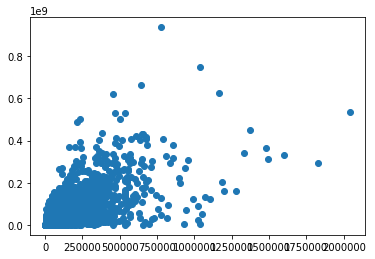

In [58]:
X = imdb_df['imdb_votes'].values
Y = imdb_df['boxoffice'].values
plt.scatter(X,Y)

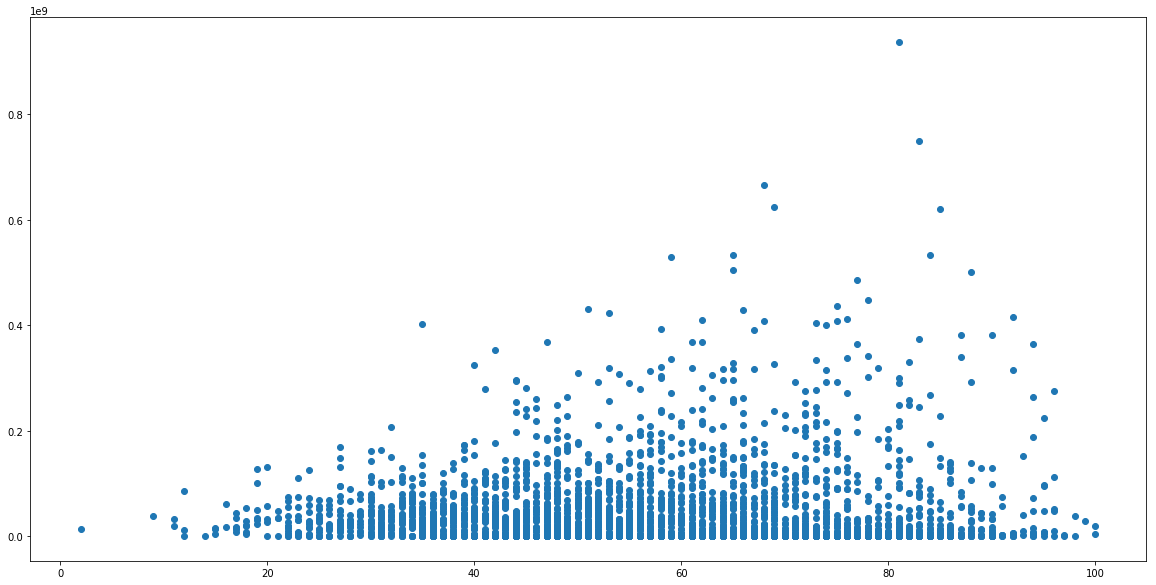

In [59]:
plt.figure(figsize=(20,10))
X = imdb_df['metacritic'].values
Y = imdb_df['boxoffice'].values
plt.scatter(X,Y)

In [69]:
imdb_df.dropna(inplace=True)

In [70]:
release_date_list = list(map(lambda x: x.split(" "), imdb_df['release_date']))

In [71]:
def convert_release_date(date_list):
    new_date_list = []
    for d in date_list:
        new_dates = []
        for date in d:
            if date == "Jan":
                date = "01"
            elif date == "Feb":
                date = "02"
            elif date == "Mar":
                date = "03"
            elif date == "Apr":
                date = "04"
            elif date == "May":
                date = "05"
            elif date == "Jun":
                date = "06"
            elif date == "Jul":
                date = "07"
            elif date == "Aug":
                date = "08"
            elif date == "Sep":
                date = "09"
            elif date == "Oct":
                date = "10"
            elif date == "Nov":
                date = "11"
            elif date == "Dec":
                date = "12"
            new_dates.append(date)
        new_date_list.append(new_dates)
    return list(map(lambda x: "-".join(x),new_date_list))

In [72]:
convert_release_date(release_date_list)

['13-03-1927',
 '25-08-1939',
 '25-12-2001',
 '07-05-2004',
 '05-06-1956',
 '29-01-1958',
 '05-08-1964',
 '20-09-1967',
 '01-12-1966',
 '12-05-1968',
 '09-10-1971',
 '30-06-1971',
 '20-06-1980',
 '09-12-1983',
 '11-10-1985',
 '03-07-1985',
 '10-07-1985',
 '21-08-1987',
 '19-08-1988',
 '23-02-1990',
 '01-06-1990',
 '15-12-1990',
 '22-11-1991',
 '26-02-2016',
 '03-07-1991',
 '26-02-1993',
 '29-05-1992',
 '11-06-1993',
 '29-10-1993',
 '06-07-1994',
 '24-06-1994',
 '21-03-1997',
 '26-06-1998',
 '23-06-2000',
 '08-07-2005',
 '22-11-2002',
 '19-10-2001',
 '19-12-2001',
 '15-03-2002',
 '18-01-2002',
 '14-07-2000',
 '03-07-2002',
 '19-05-1999',
 '15-12-2000',
 '23-09-2005',
 '16-05-2002',
 '18-05-2001',
 '19-05-2000',
 '27-07-2001',
 '27-11-2002',
 '10-10-2003',
 '03-05-2002',
 '15-06-2001',
 '03-11-2000',
 '30-11-2001',
 '03-11-2000',
 '21-07-2000',
 '21-09-2001',
 '16-06-2000',
 '04-08-2000',
 '31-05-2002',
 '06-04-2001',
 '02-07-2003',
 '24-05-2002',
 '19-10-2001',
 '02-04-2004',
 '17-12-20

In [73]:
imdb_df['release_date'] = convert_release_date(release_date_list)

In [74]:
imdb_df

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,rotten_tomatoes,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors
9,0017136,Metropolis,Not Rated,153 min,"Sometime in the future, the city of Metropolis...",German,Germany,6 wins & 5 nominations.,8.3,141814,99,98,529603.0,Paramount Pictures,13-03-1927,movie,"Thea von Harbou (screenplay), Thea von Harbou ...",Fritz Lang,"Drama, Sci-Fi","Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog..."
44,0032138,The Wizard of Oz,PG,102 min,In this charming film based on the popular L. ...,English,USA,Won 2 Oscars. Another 7 wins & 14 nominations.,8.0,349731,98,100,3840702.0,Warner Bros. Pictures,25-08-1939,movie,"Noel Langley (screenplay), Florence Ryerson (s...","Victor Fleming, George Cukor, Mervyn LeRoy, No...","Adventure, Family, Fantasy, Musical","Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr"
64,0035423,Kate & Leopold,PG-13,118 min,Kate and her actor brother live in N.Y. in the...,"English, French",USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,6.4,73934,50,44,47095453.0,Miramax Films,25-12-2001,movie,"Steven Rogers (story), James Mangold (screenpl...",James Mangold,"Comedy, Fantasy, Romance","Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki..."
141,0047034,Godzilla,Not Rated,96 min,Japan is thrown into a panic after several shi...,Japanese,Japan,2 wins & 2 nominations.,7.6,24513,93,78,2340.0,Rialto Pictures,07-05-2004,movie,"Takeo Murata, Ishirô Honda, Shigeru Kayama (st...",Ishirô Honda,"Drama, Horror, Sci-Fi, Thriller","Akira Takarada, Momoko Kôchi, Akihiko Hirata, ..."
151,0048021,Rififi,Not Rated,118 min,"After five years in prison, Tony le Stéphanois...","French, Italian, English",France,6 wins & 1 nomination.,8.2,22694,94,97,57226.0,Rialto Pictures,05-06-1956,movie,"Auguste Le Breton (novel), Jules Dassin (adapt...",Jules Dassin,"Crime, Thriller","Jean Servais, Carl Möhner, Robert Manuel, Jani..."
186,0051378,Elevator to the Gallows,Not Rated,91 min,Florence Carala and her lover Julien Tavernier...,"French, German",France,1 win.,8.0,17930,93,94,109257.0,Rialto Pictures,29-01-1958,movie,"Roger Nimier (adaptation), Louis Malle (adapta...",Louis Malle,"Crime, Drama, Thriller","Jeanne Moreau, Maurice Ronet, Georges Poujouly..."
270,0057869,Band of Outsiders,Not Rated,95 min,"A triangle: Franz, Arthur, and Odile. Franz, a...","French, English",France,N/A,7.8,19992,94,88,37651.0,Royal Films International,05-08-1964,movie,Dolores Hitchens (novel),Jean-Luc Godard,"Comedy, Crime, Drama","Anna Karina, Danièle Girard, Louisa Colpeyn, C..."
284,0058946,The Battle of Algiers,Not Rated,121 min,A film commissioned by the Algerian government...,"French, Arabic, English","Italy, Algeria",Nominated for 3 Oscars. Another 9 wins & 5 nom...,8.1,46812,98,95,55908.0,Rialto Pictures,20-09-1967,movie,"Franco Solinas, Franco Solinas (story), Gillo ...",Gillo Pontecorvo,"Drama, War","Jean Martin, Yacef Saadi, Brahim Hadjadj, Tomm..."
297,0060315,Django,Not Rated,91 min,"In the opening scene a lone man walks, behind ...",Italian,"Italy, Spain",N/A,7.3,21931,92,75,25097.0,Rialto Pictures,01-12-1966,movie,"Sergio Corbucci (story), Bruno Corbucci (story...",Sergio Corbucci,"Action, Western","Franco Nero, José Bódalo, Loredana Nusciak, Án..."
323,0062622,2001: A Space Odyssey,G,149 min,"""2001"" is a story of evolution. Sometime in th...","English, Russian","UK, USA",Won 1 Oscar. Another 13 wins & 10 nominations.,8.3,537872,93,82,135620.0,Warner Bros. Pictures,12-05-1968,movie,"Stanley Kubrick (screenplay), Arthur C. Clarke...",Stanley Kubrick,"Adventure, Sci-Fi","Keir Dullea, Gary Lockwood, William Sylvester,..."


In [77]:
imdb_df.loc[imdb_df['release_date'] == "N/A"]

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,rotten_tomatoes,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors
4808,2125423,Five Broken Cameras,Not Rated,94 min,"When his fourth son, Gibreel, is born, Emad, a...","Hebrew, Arabic","Palestine, Israel, France, Netherlands",Nominated for 1 Oscar. Another 18 wins & 6 nom...,7.9,5456,96,78,108541.0,Kino Lorber Films,N/A,movie,N/A,"Emad Burnat, Guy Davidi","Documentary, War","Emad Burnat, Soraya Burnat, Mohammed Burnat, Y..."


In [78]:
imdb_df.drop(4808,inplace=True)

In [79]:
imdb_df

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,rotten_tomatoes,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors
9,0017136,Metropolis,Not Rated,153 min,"Sometime in the future, the city of Metropolis...",German,Germany,6 wins & 5 nominations.,8.3,141814,99,98,529603.0,Paramount Pictures,13-03-1927,movie,"Thea von Harbou (screenplay), Thea von Harbou ...",Fritz Lang,"Drama, Sci-Fi","Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog..."
44,0032138,The Wizard of Oz,PG,102 min,In this charming film based on the popular L. ...,English,USA,Won 2 Oscars. Another 7 wins & 14 nominations.,8.0,349731,98,100,3840702.0,Warner Bros. Pictures,25-08-1939,movie,"Noel Langley (screenplay), Florence Ryerson (s...","Victor Fleming, George Cukor, Mervyn LeRoy, No...","Adventure, Family, Fantasy, Musical","Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr"
64,0035423,Kate & Leopold,PG-13,118 min,Kate and her actor brother live in N.Y. in the...,"English, French",USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,6.4,73934,50,44,47095453.0,Miramax Films,25-12-2001,movie,"Steven Rogers (story), James Mangold (screenpl...",James Mangold,"Comedy, Fantasy, Romance","Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki..."
141,0047034,Godzilla,Not Rated,96 min,Japan is thrown into a panic after several shi...,Japanese,Japan,2 wins & 2 nominations.,7.6,24513,93,78,2340.0,Rialto Pictures,07-05-2004,movie,"Takeo Murata, Ishirô Honda, Shigeru Kayama (st...",Ishirô Honda,"Drama, Horror, Sci-Fi, Thriller","Akira Takarada, Momoko Kôchi, Akihiko Hirata, ..."
151,0048021,Rififi,Not Rated,118 min,"After five years in prison, Tony le Stéphanois...","French, Italian, English",France,6 wins & 1 nomination.,8.2,22694,94,97,57226.0,Rialto Pictures,05-06-1956,movie,"Auguste Le Breton (novel), Jules Dassin (adapt...",Jules Dassin,"Crime, Thriller","Jean Servais, Carl Möhner, Robert Manuel, Jani..."
186,0051378,Elevator to the Gallows,Not Rated,91 min,Florence Carala and her lover Julien Tavernier...,"French, German",France,1 win.,8.0,17930,93,94,109257.0,Rialto Pictures,29-01-1958,movie,"Roger Nimier (adaptation), Louis Malle (adapta...",Louis Malle,"Crime, Drama, Thriller","Jeanne Moreau, Maurice Ronet, Georges Poujouly..."
270,0057869,Band of Outsiders,Not Rated,95 min,"A triangle: Franz, Arthur, and Odile. Franz, a...","French, English",France,N/A,7.8,19992,94,88,37651.0,Royal Films International,05-08-1964,movie,Dolores Hitchens (novel),Jean-Luc Godard,"Comedy, Crime, Drama","Anna Karina, Danièle Girard, Louisa Colpeyn, C..."
284,0058946,The Battle of Algiers,Not Rated,121 min,A film commissioned by the Algerian government...,"French, Arabic, English","Italy, Algeria",Nominated for 3 Oscars. Another 9 wins & 5 nom...,8.1,46812,98,95,55908.0,Rialto Pictures,20-09-1967,movie,"Franco Solinas, Franco Solinas (story), Gillo ...",Gillo Pontecorvo,"Drama, War","Jean Martin, Yacef Saadi, Brahim Hadjadj, Tomm..."
297,0060315,Django,Not Rated,91 min,"In the opening scene a lone man walks, behind ...",Italian,"Italy, Spain",N/A,7.3,21931,92,75,25097.0,Rialto Pictures,01-12-1966,movie,"Sergio Corbucci (story), Bruno Corbucci (story...",Sergio Corbucci,"Action, Western","Franco Nero, José Bódalo, Loredana Nusciak, Án..."
323,0062622,2001: A Space Odyssey,G,149 min,"""2001"" is a story of evolution. Sometime in th...","English, Russian","UK, USA",Won 1 Oscar. Another 13 wins & 10 nominations.,8.3,537872,93,82,135620.0,Warner Bros. Pictures,12-05-1968,movie,"Stanley Kubrick (screenplay), Arthur C. Clarke...",Stanley Kubrick,"Adventure, Sci-Fi","Keir Dullea, Gary Lockwood, William Sylvester,..."


In [80]:
import wget

In [81]:
wget.download("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCNS&scale=left&cosd=1913-01-01&coed=2019-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-04-29&revision_date=2019-04-29&nd=1913-01-01")

'CPIAUCNS (2).csv'

In [82]:
inflation_df = pd.read_csv('data/CPIAUCNS.csv')

In [83]:
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'],infer_datetime_format=True)

In [86]:
inflation_df['DATE'].head()

0   1913-01-01
1   1913-02-01
2   1913-03-01
3   1913-04-01
4   1913-05-01
Name: DATE, dtype: datetime64[ns]

In [88]:
imdb_df.sort_values(by='release_date').head()

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,rotten_tomatoes,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors
2150,0337909,Calendar Girls,PG-13,108 min,Middle aged Chris Harper and Annie Clarke are ...,English,"UK, USA",Nominated for 1 Golden Globe. Another 2 wins &...,6.9,21704,74,60,30937521.0,Buena Vista Pictures,01-01-2004,movie,"Juliette Towhidi, Tim Firth",Nigel Cole,"Comedy, Drama","Helen Mirren, Julie Walters, John Alderton, Li..."
4530,1924396,The Best Offer,R,131 min,In the world of high-end art auctions and anti...,English,Italy,25 wins & 26 nominations.,7.8,95036,55,49,85433.0,IFC Films,01-01-2014,movie,Giuseppe Tornatore (story and screenplay),Giuseppe Tornatore,"Crime, Drama, Mystery, Romance","Geoffrey Rush, Jim Sturgess, Sylvia Hoeks, Don..."
6117,4185572,The Hunting Ground,PG-13,103 min,From the makers of The Invisible War (2012) co...,English,USA,Nominated for 1 Oscar. Another 8 wins & 22 nom...,7.4,5572,93,77,185328.0,Radius,01-01-2016,movie,Kirby Dick,Kirby Dick,Documentary,"Andrea Pino, Annie Clark, Claire Potter, Melin..."
2866,0775529,The Savages,R,113 min,Jon and Wendy Savage are two siblings who have...,"English, German, Cantonese",USA,Nominated for 2 Oscars. Another 17 wins & 31 n...,7.2,34309,89,85,6426953.0,Fox Searchlight Pictures,01-02-2008,movie,Tamara Jenkins,Tamara Jenkins,"Comedy, Drama","Laura Linney, Philip Seymour Hoffman, Philip B..."
2446,0406759,The Eye,PG-13,98 min,The violinist Sydney Wells has been blind sinc...,"English, Spanish","USA, Canada",2 wins & 3 nominations.,5.4,48901,22,36,31400000.0,Lionsgate Films,01-02-2008,movie,"Sebastian Gutierrez (screenplay), Yuet-Jan Hui...","David Moreau, Xavier Palud","Horror, Mystery","Jessica Alba, Alessandro Nivola, Parker Posey,..."


In [89]:
imdb_df.drop(3309,inplace=True)

In [91]:
x = inflation_df.loc[1272]["CPIAUCNS"]

In [92]:
x 

251.71200000000002

In [93]:
month_year_df = pd.DataFrame()

In [94]:
month_year_df['title']=imdb_df['release_date']
month_year_df['year']=pd.DatetimeIndex(imdb_df['release_date']).year
month_year_df['month']=pd.DatetimeIndex(imdb_df['release_date']).month
month_year_df['day'] = [1 for i in month_year_df['month']]

In [95]:
month_year_df

,title,year,month,day
9,13-03-1927,1927,3,1
44,25-08-1939,1939,8,1
64,25-12-2001,2001,12,1
141,07-05-2004,2004,7,1
151,05-06-1956,1956,5,1
186,29-01-1958,1958,1,1
270,05-08-1964,1964,5,1
284,20-09-1967,1967,9,1
297,01-12-1966,1966,1,1
323,12-05-1968,1968,12,1


In [96]:
def new_date_time(month,day,year):
    l = [str(month),str(day),str(year)]
    return '-'.join(l)

In [97]:
month_year_df['adjusted_date'] = month_year_df.apply(lambda row: new_date_time(row['month'],row['day'],row['year']),axis=1)
month_year_df['adjusted_date'] = pd.to_datetime(month_year_df['adjusted_date'],infer_datetime_format=True)

In [100]:
month_year_df['adjusted_date'].head()

9     1927-03-01
44    1939-08-01
64    2001-12-01
141   2004-07-01
151   1956-05-01
Name: adjusted_date, dtype: datetime64[ns]

In [101]:
inflation_df.head()

,DATE,CPIAUCNS
0,1913-01-01,9.8
1,1913-02-01,9.8
2,1913-03-01,9.8
3,1913-04-01,9.8
4,1913-05-01,9.7


In [102]:
inflation_df['DATE'].head()

0   1913-01-01
1   1913-02-01
2   1913-03-01
3   1913-04-01
4   1913-05-01
Name: DATE, dtype: datetime64[ns]

In [103]:
month_year_df['adjusted_date'].head()

9     1927-03-01
44    1939-08-01
64    2001-12-01
141   2004-07-01
151   1956-05-01
Name: adjusted_date, dtype: datetime64[ns]

In [104]:
inflation_df = pd.merge(inflation_df,month_year_df,left_on='DATE', right_on='adjusted_date')

In [105]:
inflation_df['CPIAUCNS'][3007]

246.524

In [106]:
imdb_df['inflation_adj_gross'] = np.array((251.712/inflation_df['CPIAUCNS']))*imdb_df['boxoffice']

In [107]:
imdb_df['release_date'] = pd.to_datetime(imdb_df['release_date'],infer_datetime_format=True)

In [109]:
imdb_df.release_date.head()

9     1927-03-13
44    1939-08-25
64    2001-12-25
141   2004-05-07
151   1956-06-05
Name: release_date, dtype: datetime64[ns]

In [111]:
imdb_df['genres'] = imdb_df['genres'].apply(lambda genre: genre.split(","))
imdb_df['actors'] = imdb_df['actors'].apply(lambda genre: genre.split(","))

In [112]:
imdb_df['release_date'].describe()

count                    3040
unique                   1344
top       2013-10-25 00:00:00
freq                        8
first     1927-03-13 00:00:00
last      2018-04-27 00:00:00
Name: release_date, dtype: object

In [114]:
imdb_df.head()

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,...,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors,inflation_adj_gross
9,0017136,Metropolis,Not Rated,153 min,"Sometime in the future, the city of Metropolis...",German,Germany,6 wins & 5 nominations.,8.3,141814,...,98,529603.0,Paramount Pictures,1927-03-13,movie,"Thea von Harbou (screenplay), Thea von Harbou ...",Fritz Lang,"[Drama, Sci-Fi]","[Alfred Abel, Gustav Fröhlich, Rudolf Klein-...",7.705632e+06
44,0032138,The Wizard of Oz,PG,102 min,In this charming film based on the popular L. ...,English,USA,Won 2 Oscars. Another 7 wins & 14 nominations.,8.0,349731,...,100,3840702.0,Warner Bros. Pictures,1939-08-25,movie,"Noel Langley (screenplay), Florence Ryerson (s...","Victor Fleming, George Cukor, Mervyn LeRoy, No...","[Adventure, Family, Fantasy, Musical]","[Judy Garland, Frank Morgan, Ray Bolger, Be...",7.005440e+07
64,0035423,Kate & Leopold,PG-13,118 min,Kate and her actor brother live in N.Y. in the...,"English, French",USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,6.4,73934,...,44,47095453.0,Miramax Films,2001-12-25,movie,"Steven Rogers (story), James Mangold (screenpl...",James Mangold,"[Comedy, Fantasy, Romance]","[Meg Ryan, Hugh Jackman, Liev Schreiber, Br...",4.390552e+08
141,0047034,Godzilla,Not Rated,96 min,Japan is thrown into a panic after several shi...,Japanese,Japan,2 wins & 2 nominations.,7.6,24513,...,78,2340.0,Rialto Pictures,2004-05-07,movie,"Takeo Murata, Ishirô Honda, Shigeru Kayama (st...",Ishirô Honda,"[Drama, Horror, Sci-Fi, Thriller]","[Akira Takarada, Momoko Kôchi, Akihiko Hirat...",2.059462e+04
151,0048021,Rififi,Not Rated,118 min,"After five years in prison, Tony le Stéphanois...","French, Italian, English",France,6 wins & 1 nomination.,8.2,22694,...,97,57226.0,Rialto Pictures,1956-06-05,movie,"Auguste Le Breton (novel), Jules Dassin (adapt...",Jules Dassin,"[Crime, Thriller]","[Jean Servais, Carl Möhner, Robert Manuel, ...",4.661641e+05


In [115]:
imdb_df.to_csv('imdb_df.csv')